<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Аргумент-class_weight" data-toc-modified-id="Аргумент-class_weight-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Аргумент class_weight</a></span></li><li><span><a href="#Техника-upsampling" data-toc-modified-id="Техника-upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Техника upsampling</a></span></li><li><span><a href="#Техника-downsampling" data-toc-modified-id="Техника-downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Техника downsampling</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
df = pd.read_csv('/datasets/Churn.csv')


Загрузим данные и посмотрим на таблицу.

In [2]:
df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбце 'Tenure' (сколько лет человек является клиентом банка) почти 10% значений это NaN, их можно заменит медианой.

In [4]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Также имеются 3 столбца с данными типа object и 3 столбца с данными float.
- 'Surname' (тип object) - не будем использовать как признак для обучения модели, так как фамилия не влияет на отток клиентов (как и ID клиента и "технический" столбец 'RowNumber');
- 'Geography' (тип object) - поменяем категориальные данные на численные техникой прямого кодирования One-Hot Encoding;
- 'Gender' (тип object) - поменяем категориальные данные на численные техникой прямого кодирования One-Hot Encoding;
- 'Tenure' (тип float) - поменяем тип на int;
- 'Balance' (тип float) - округлим и заменим тип на int;
- 'EstimatedSalary' (тип float) - округлим и заменим тип на int.

In [5]:
df['Tenure'] = df['Tenure'].astype(int)
df['Balance'] = df['Balance'].round().astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].round().astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null int64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null int64
Exited             10000 non-null int64
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [6]:
df_ohe = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
RowNumber            10000 non-null int64
CustomerId           10000 non-null int64
Surname              10000 non-null object
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null int64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null int64
Exited               10000 non-null int64
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: int64(11), object(1), uint8(3)
memory usage: 966.9+ KB


In [7]:
df_ohe.sample(15)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
7656,7657,15575146,Jamieson,492,51,8,117809,2,1,1,67311,0,1,0,1
9390,9391,15619130,Simpson,752,37,5,113291,2,1,1,132468,0,1,0,0
9890,9891,15670427,Chidi,662,37,4,155187,1,1,0,48931,0,0,1,1
8398,8399,15582116,Ma,767,45,5,132746,2,1,0,26629,1,1,0,0
1318,1319,15665077,Vogel,598,43,5,0,3,1,1,100723,1,0,0,0
7318,7319,15771856,Cremin,632,32,1,0,2,1,0,19526,0,0,1,0
9840,9841,15607877,Maclean,576,26,8,0,2,0,1,34101,0,0,1,1
6227,6228,15636016,Wreford,588,34,3,120778,1,1,1,131730,0,0,0,0
8106,8107,15764892,Spinelli,590,51,5,84475,2,1,1,190937,0,0,1,0
9238,9239,15639133,Ku,773,50,4,0,2,1,0,129373,0,0,0,0


Подготовим данные с признаками и целевым признаком.

In [8]:
target = df_ohe['Exited']
features = df_ohe.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)

Данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1. Применим к нашему датасету функцию train_test_split(), чтоб разделить его на тестовую выборку (20%) и обучающую-вылидационную.

In [9]:
features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, target, 
                                                    test_size=0.2, 
                                                    random_state=12345)

Получившиеся выборки features_train_valid и target_train_valid разделим на валидационную (25%)) и обучающую выборки (75%).

In [10]:
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, target_train_valid,
                                                                              test_size=0.25, 
                                                                              random_state=12345) 

## Исследование задачи

Обучим модель без учёта дисбаланса классов и посмотрим значение F1-меры (и auc-roc) для модели логистичесской регресии

In [11]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("auc_roc:", auc_roc)

F1: 0.10290827740492169
auc_roc: 0.6813607600469863


F1=0.10 это очень мало (Значение auc-roc тоже далеко до 1).
Посмотрим для какой глубины модели решающего дерева будет лучшая F1-мера 

In [12]:
best_depth = None
best_f1 = 0
for depth in range(2, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_f1:
        best_depth = depth
        best_f1 = result
print(best_depth, best_f1)

7 0.5583596214511041


In [13]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("auc_roc:", auc_roc)

F1: 0.5583596214511041
auc_roc: 0.8231010349393358


Лучшее значение F1-меры=0.56 при максимальной глубине решающего дерева max_depth=7 (auc_roc = 0.82).

Посмотрим при каком значении гиперпараметра n_estimators лучшее значение F1-меры у модели случайного леса.

In [14]:
best_est = None
best_f1 = 0
for est in range(1, 101):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_f1:
        best_est = est
        best_f1 = result
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(best_est, best_f1)
print("auc_roc:", auc_roc)


45 0.5736677115987461
auc_roc: 0.8368273728817601


При n_estimators=45, значение F1=0.573 (auc-roc = 0.84). Лучшее значение среди всех моделей до учета дисбаланса классов. 

## Борьба с дисбалансом

### Аргумент class_weight
Сделаем веса классов сбалансированными при помощи аргумента class_weight. Посмотрим значение F1 для 3 разных моделей.

In [15]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)

predictions_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("auc_roc:", auc_roc)

F1: 0.4330900243309002
auc_roc: 0.7200672686725406


In [16]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7, class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("auc_roc:", auc_roc)

F1: 0.5549949545913219
auc_roc: 0.8083621699551278


In [17]:
model = RandomForestClassifier(random_state=12345, n_estimators=45, class_weight='balanced') 
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("auc_roc:", auc_roc)

F1: 0.5551948051948052
auc_roc: 0.8442568099199039


Опять лучшее значение у случайного леса, но F1 хуже, чем до балансировки классов (хотя auc-roc немного лучше). Попробуем другие методы: увеличение выборки и уменьшение выборки.

### Техника upsampling
Разделили обучающую выборку на отрицательные и положительные объекты. И посмотрим во сколько отрицательных ответов больше, чем положительных.

In [18]:
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
target_zeros.shape, target_ones.shape

((4781,), (1219,))

Отрицательных ответов больше, чем положительных в 4 раза.

Напишем функцию upsample, которая:
- принимает 3 параметра (features - признаки обучающей выборки, target целевой признак обучающей выборки, repeat - количество повторений для положительных ответов в обучающей выборке); 
- делит обучающую выборку на отрицательные и положительные объекты;
- дублирует объекты положительного класса и объедините их с объектами отрицательного класса (функцией pd.concat());
- перемешивает данные (функцией shuffle());
- возвращает признаки и целевой признак после операции upsampling.

In [19]:
def upsample(features, target, repeat):
    
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    repeat = 4
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
   
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Посмотрим значение F1 и auc-roc для 3 разных моделей, обученных на данных с увеличинной выборкой.

In [20]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

predictions_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("auc_roc:", auc_roc)

F1: 0.4327764518695307
auc_roc: 0.7203327192470742


In [21]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_upsampled, target_upsampled)

predictions_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("auc_roc:", auc_roc)

F1: 0.5549949545913219
auc_roc: 0.8083621699551278


In [22]:
best_est = None
best_f1 = 0
for est in range(1, 101):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_upsampled, target_upsampled) 
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_f1:
        best_est = est
        best_f1 = result
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(best_est, best_f1)
print("auc_roc:", auc_roc)

87 0.5933147632311978
auc_roc: 0.8433770081653869


Лучшие значения метрик у случайного леса, при значении est=87: F1 - 0.5933147632311978, auc_roc - 0.8433770081653869

### Техника downsampling
Разделили обучающую выборку на отрицательные и положительные объекты. И посмотрим во сколько отрицательных ответов больше, чем положительных .

Напишем функцию downsample, которая:
- принимает 3 параметра (features - признаки обучающей выборки, target целевой признак обучающей выборки, fraction - доля отрицательных объектов, которые нужно сохранить); 
- делит обучающую выборку на отрицательные и положительные объекты;
- cлучайным образом отбросывает часть из отрицательных объектов (функцией sample());
- перемешивает данные (функцией shuffle());
- возвращает признаки и целевой признак после операции downsampling.

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Посмотрим значение F1 для 3 разных моделей, обученных на данных с увеличинной выборкой.

In [24]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("auc_roc:", auc_roc)

F1: 0.4376470588235294
auc_roc: 0.7177354363800807


In [25]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("auc_roc:", auc_roc)

F1: 0.5493482309124766
auc_roc: 0.8143546769371137


In [26]:
best_est = None
best_f1 = 0
for est in range(1, 101):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_f1:
        best_est = est
        best_f1 = result
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(best_est, best_f1)
print("auc_roc:", auc_roc)

78 0.5601539942252166
auc_roc: 0.8434024405557613


Опять лучшее значение у модели, обученной алгоритмом случайного леса (при est=78), но F1-мера (0.56) хуже, чем при техники upsampling.

### Выбор лучшей модели

Моделью с самой лучшей F1-мерой (0.59) стала модель с алгоритмом классификации — случайный лес, с гиперпараметром n_estimators=87, обученная выборкой, с применением техники upsampling для избавления от дисбаланса классов.

## Тестирование модели

Протестируем лучшую модель на тестовой выборке.

In [27]:
model = RandomForestClassifier(random_state=12345, n_estimators=87) 
model.fit(features_upsampled, target_upsampled) 
predictions_test = model.predict(features_test)
result = f1_score(target_test, predictions_test)
print("F1:", f1_score(target_test, predictions_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("auc_roc:", auc_roc)

F1: 0.58898847631242
auc_roc: 0.8561036578920335


На тестовой выборке значение F1-меры для модели, выбранной лучшей оказалось меньше 0.59. Попробуем добавить гиперпараметр max_depth, со значением 7 из лучшей модели дерева решений.

In [28]:
model = RandomForestClassifier(random_state=12345, max_depth=7, n_estimators=87) 
model.fit(features_upsampled, target_upsampled) 
predictions_test = model.predict(features_test)
result = f1_score(target_test, predictions_test)
print("F1:", f1_score(target_test, predictions_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("auc_roc:", auc_roc)

F1: 0.6340508806262232
auc_roc: 0.8687675960403233


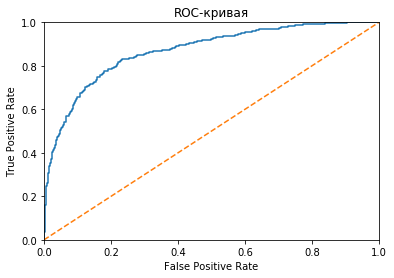

In [30]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

В результате значение F1: 0.6340508806262232, а auc_roc: 0.8687675960403233.

## Вывод

В данном проекте решалась задача прогнозирования ухода из "Бета-банка" клиентов. Для этого на основе исторических данных о поведении клиентов и расторжении договора с банком, были рассмотрены и обучены модели разными алгоритмами, с учетом дисбаланса классов и без него. В итоге была построена модель, обученная алгоритмом случайного леса на основе выборки, с балансировкой классов техникой upsampling. Эта модель показала лучшее значение F1-меры (0.63) на тестовой выборке и auc_roc - 0.87. Можно предложить эту модель руководству банка, для принятия решения о намерении клиента покинуть банк.